<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    
Thank you for updates! My new comments have digit 2. 
    
    
I do not have any questions, so I can accept the project now. Thank you again for such an excellent job here. 
    
    
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for an ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
    
Congratulations and good luck! 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Enrique! I am a reviewer on this project. Congratulations on submitting time series project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! You did a fantastic job here, and I hope you enjoyed this topic. You have successfully trained several models and analyzed time series, which is great! However, there're a couple of issues that need your attention. Would you take a look at my comments?
    

</div>

# Model Creation for Sweet Lift Taxi Company

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Don't forget about project title :) 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Good! 

</div>

## Preparation

In [1]:
#Let's import our necessary libraries
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import lightgbm as lgb

In [2]:
#Unpacking our data
taxi = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])
taxi = taxi.set_index(['datetime'])
display(taxi.info())
display(taxi.isna().sum())
taxi.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

num_orders    0
dtype: int64

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [3]:
taxi.index.is_monotonic

True

No missing values and we have successfully turned our dataframe into a time series and confirmed it is in chronological order.

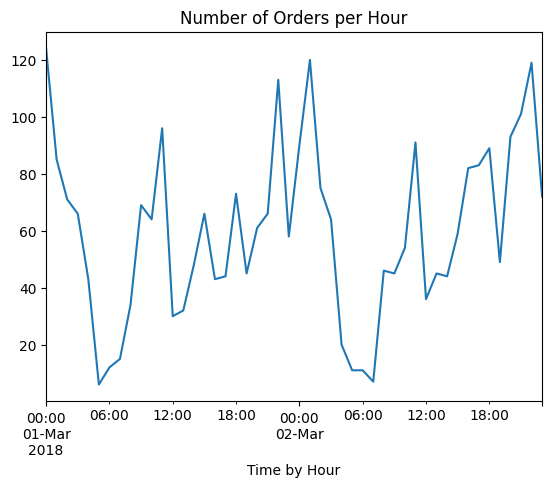

In [4]:
#Resample the data by one hour

taxi = taxi.resample('1H').sum() #sum of all orders every hour
taxi['2018-03-01':'2018-03-02'].plot(xlabel='Time by Hour', title='Number of Orders per Hour')
plt.legend().remove()
plt.show()

## Analysis

It looks like orders seem to spike as the day goes on and spikes the highest at night. However, we have only looked at two days, let's see how it looks on other days. 

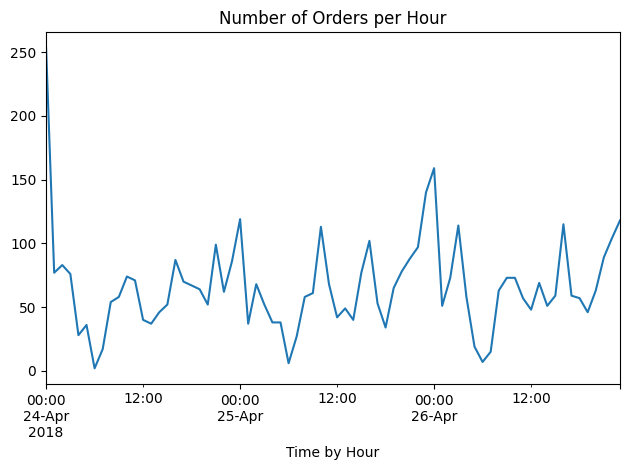

In [5]:
taxi['2018-04-24':'2018-04-26'].plot(xlabel='Time by Hour', title='Number of Orders per Hour')
plt.legend().remove()
plt.tight_layout()
plt.show()

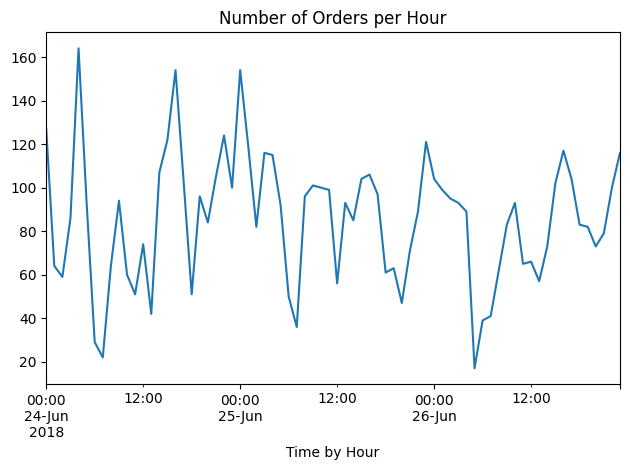

In [6]:
taxi['2018-06-24':'2018-06-26'].plot(xlabel='Time by Hour', title='Number of Orders per Hour')
plt.legend().remove()
plt.tight_layout()
plt.show()

Based on the eye test, it does look like orders will consistently dip in the early mornings around 6am, and spike past 11pm. The average number of orders increases throughout the day, but certainly not linearly. 

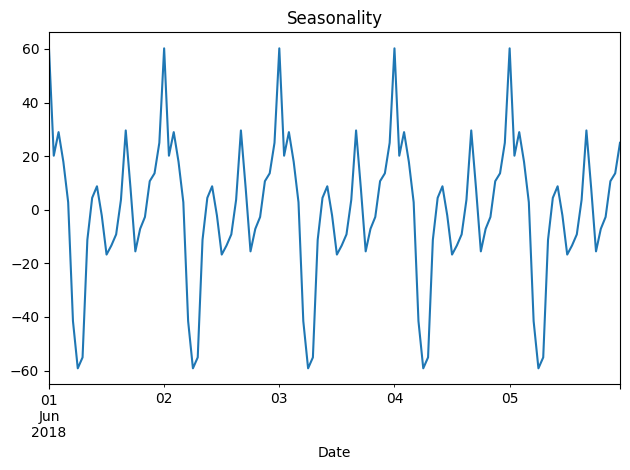

In [7]:
#Checking for seasonality

decomposed = seasonal_decompose(taxi)
decomposed.seasonal['2018-06-01':'2018-06-05'].plot(xlabel='Date', title='Seasonality')
plt.legend().remove()
plt.tight_layout()
plt.show()

The seasonality graph confirms the peaks and troughs of certain times of each day. (v2)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. We may have daily seasonality, which makes sense in such dataset.    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
    
- Please don't forget to add titles and labels.
    
    
    
- The legend can be disabled. 


- You can use `statsmodels` to analyze seasonality. There's a method `seasonal_decompose` there, which applies seasonal decomposition using moving averages. Apart from this, `statsmodels` has many interesting tools for time series analysis. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Looks great! 
</div>

To begin with our time series model, we will need to engineer new features to the dataset.

In [8]:
# Extract time-based features
taxi['hour'] = taxi.index.hour
taxi['day_of_week'] = taxi.index.dayofweek

# Create lag features
taxi['lag_1'] = taxi['num_orders'].shift(1) #The previous hour
taxi['lag_24'] = taxi['num_orders'].shift(24) #Previous day on the same hour
taxi['lag_1_week'] = taxi['num_orders'].shift(168) #7 days in the past

# Rolling statistics
taxi['rolling_1day_mean'] = taxi['num_orders'].shift(1).rolling(window=24).mean() #shifted 24-hour moving average
taxi['rolling_3day_mean'] = taxi['num_orders'].shift(1).rolling(window=72).mean() #shifted 72_hour moving average
display(taxi.sample(10))
taxi.info()

,num_orders,hour,day_of_week,lag_1,lag_24,lag_1_week,rolling_1day_mean,rolling_3day_mean
datetime,,,,,,,,
2018-06-21 17:00:00,100,17,3,92.0,103.0,124.0,80.666667,79.250000
2018-04-17 19:00:00,71,19,1,49.0,64.0,71.0,56.666667,61.555556
2018-07-02 22:00:00,71,22,0,83.0,103.0,89.0,98.000000,93.597222
2018-04-21 18:00:00,45,18,5,61.0,62.0,61.0,79.125000,70.430556
2018-04-23 02:00:00,129,2,0,74.0,102.0,79.0,67.416667,69.652778
2018-07-10 15:00:00,80,15,1,97.0,122.0,95.0,90.625000,90.166667
2018-04-19 02:00:00,94,2,3,37.0,91.0,76.0,68.166667,64.236111
2018-06-11 11:00:00,71,11,0,78.0,60.0,103.0,82.291667,86.305556
2018-08-15 09:00:00,131,9,2,92.0,135.0,122.0,115.416667,123.986111


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_orders         4416 non-null   int64  
 1   hour               4416 non-null   int64  
 2   day_of_week        4416 non-null   int64  
 3   lag_1              4415 non-null   float64
 4   lag_24             4392 non-null   float64
 5   lag_1_week         4248 non-null   float64
 6   rolling_1day_mean  4392 non-null   float64
 7   rolling_3day_mean  4344 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 439.5 KB


We shifted our moving averages in order to avoid target leakage since this metric uses the current (target) value of the time series into account. We don't want this as we want our model to only use historical data. 

This will introduce missing values into our dataset, but they can be dropped when we begin model training.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct. 
</div>

## Training

In [9]:
#Split the data to begin model training

train, temp = train_test_split(taxi, shuffle=False, test_size=0.2)
valid, test = train_test_split(temp, shuffle=False, test_size=0.5)
train = train.dropna()

#Begin with an autoregressive model

mod = ar_select_order(endog=train['num_orders'], maxlag=20,seasonal=True)
ar_order = mod.ar_lags

# create AR model and fit it using the training set
ar_model = AutoReg(train['num_orders'], lags=ar_order)
ar_model = ar_model.fit()

# Print the number of optimal lags
print("Optimal number of lags:", len(ar_order))

Optimal number of lags: 12


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! 

</div>

86.26662930669983


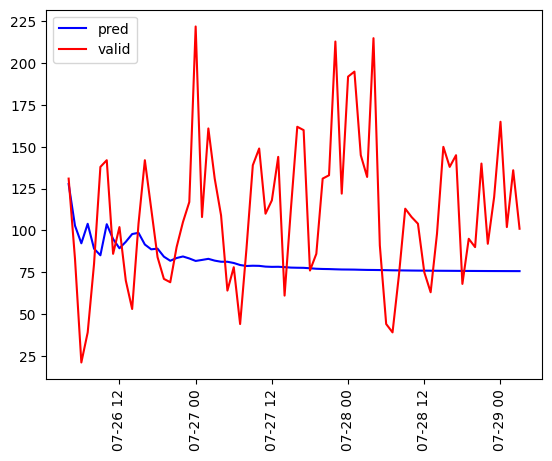

In [10]:
#Make predictions
start_value = len(train)
end_value = len(train) + len(valid) - 1
ar_pred = ar_model.predict(start=start_value, end=end_value, dynamic=False)

#Evaluate model
ar_rmse_value = mean_squared_error(test['num_orders'], ar_pred, squared=False)
print(ar_rmse_value)

#Visualize the results for the first 3 days of the test set
plt.plot(ar_pred[:72], color='blue', label='pred')
plt.plot(valid['num_orders'][:72], color='red', label='valid')
plt.legend(loc="upper left")
plt.xticks(rotation=90)
plt.show()

This model was extremely poor at predicting incoming orders. Let's try the auto_arima function to find a more suitable model.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Yes, it definitely needs to be improved before we can use it.
</div>

In [11]:
# Create the RMSE scorer
def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

custom_scorer = make_scorer(rmse_scorer, greater_is_better=False)
train_20d = train.last('20D') #Smaller sample for computational purposes

# Fit auto ARIMA on the target variable
model_auto = auto_arima(train_20d['num_orders'],
                  seasonal=True,  #Taxi demand is seasonal
                  m=24, # hourly data, so period is 24
                  scoring = custom_scorer,
                  start_p=0,
                  start_q=0,
                  max_p=1,    
                  max_q=1,    
                  max_d=1,   
                  max_P=1,    
                  max_Q=1,    
                  max_D=1,
                  stepwise=True)

# Make predictions
arima_pred = model_auto.predict(len(valid))

# Calculate RMSE
arima_rmse = mean_squared_error(valid['num_orders'], arima_pred, squared=False)
print(f"ARIMA RMSE: {arima_rmse:.2f}")

ARIMA RMSE: 41.65


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice code!
</div>

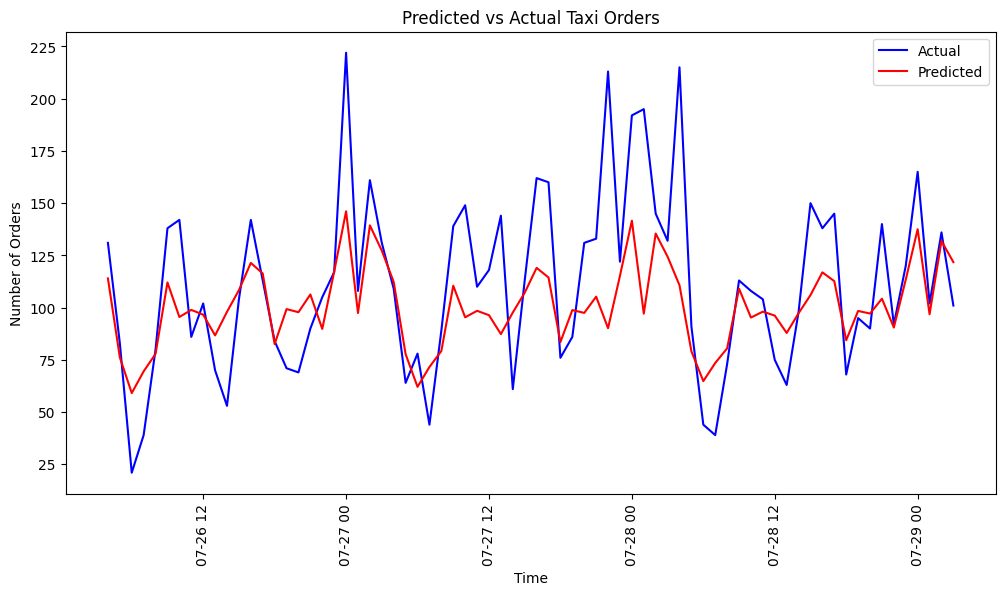

In [12]:
#Visualize the results on validation set

plt.figure(figsize=(12, 6))
plt.plot(valid.index[:72], valid['num_orders'][:72], label='Actual', color='blue') #First 72 hours of validation data
plt.plot(valid.index[:72], arima_pred[:72], label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.title('Predicted vs Actual Taxi Orders')
plt.legend()
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Well done!     
</div>


In [13]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  480
Model:             SARIMAX(1, 0, [1], 24)   Log Likelihood               -2283.575
Date:                    Mon, 11 Nov 2024   AIC                           4575.149
Time:                            06:55:01   BIC                           4591.844
Sample:                        07-06-2018   HQIC                          4581.712
                             - 07-26-2018                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.0552      3.093      2.604      0.009       1.993      14.118
ar.S.L24       0.9142      0.032     28.144      0.000       0.851       0.978
ma.S.L24      -0.6625      0.076     -8.675      0.000      -0.812      -0.513
sigma2       749.5817     36.403     20.591      0.000     678.234     820.929
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):               146.99
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.81
Prob(H) (two-sided):                  0.48   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Results here are very accurate and meet our RMSE goal. However, we will still need to verify on our final test data. Additionally, we can continue to test other models.

In [14]:
display(taxi.sample(10))
features = ['hour','day_of_week','lag_1','lag_24','lag_1_week','rolling_1day_mean', 'rolling_3day_mean']

#Creating a Linear Regression model
model = LinearRegression()
model.fit(train[features], train['num_orders'])
valid_pred = model.predict(valid[features].dropna())

print("RMSE for the validation set: ", mean_squared_error(valid['num_orders'], valid_pred, squared=False))

,num_orders,hour,day_of_week,lag_1,lag_24,lag_1_week,rolling_1day_mean,rolling_3day_mean
datetime,,,,,,,,
2018-04-20 19:00:00,51,19,4,62.0,62.0,80.0,65.458333,65.611111
2018-03-09 06:00:00,4,6,4,1.0,6.0,11.0,61.666667,58.083333
2018-03-16 06:00:00,5,6,4,12.0,5.0,4.0,58.875000,56.125000
2018-08-06 20:00:00,67,20,0,104.0,90.0,76.0,118.375000,108.222222
2018-03-01 07:00:00,15,7,3,12.0,NaN,NaN,NaN,NaN
2018-07-25 12:00:00,83,12,2,93.0,93.0,85.0,100.500000,105.986111
2018-05-19 19:00:00,77,19,5,46.0,55.0,75.0,88.666667,82.388889
2018-05-16 12:00:00,43,12,2,83.0,41.0,44.0,69.708333,76.666667
2018-04-29 01:00:00,83,1,6,129.0,128.0,59.0,77.416667,74.097222


RMSE for the validation set:  30.55690502734403


Our linear regression model shows great results here on the validation set.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Yes, the dataset is super small and does not have any features. A simple model should work fine.     
</div>


In [15]:
#Creating a Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(train[features], train['num_orders'])
valid_pred = model.predict(valid[features].dropna())

print("RMSE for the validation set: ", mean_squared_error(valid['num_orders'], valid_pred, squared=False))

RMSE for the validation set:  30.55690502734403


Random forest performs even better. We will still need to take overfitting into account.

Let's tune the hyperparameters of Random Forest and see if we can improve our results. We will need to use TimeSeriesSplit to cross validate our time series properly. Then we will use GridSearchCV in order to perform the testing. (v2)

In [16]:
# Define parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [4, 6, 8, 12]
}

# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=4)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(train[features], train['num_orders'])

# Get best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

# Make predictions with best model
valid_pred = grid_search.predict(valid[features])
print("Validation RMSE:", mean_squared_error(valid['num_orders'], valid_pred, squared=False))

Best parameters: {'max_depth': 6, 'n_estimators': 200}
Best RMSE: 22.417745250442653
Validation RMSE: 30.556936738593063


It looks like Random Forest was already optimized!

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good job!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please try to implement hyperparameter tuning for at least one of the models. For this purpose, we either need to split data into three subsets or use cross-validation. If you choose the second option, please do not forget about the correct order in the data. In order to use the `GridSearchCV` method correctly, we have to employ the `TimeSeriesSplit` class, a cross-validator for time series.  You can also use advanced models and tune hyperparameters for ARIMA. 
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Correct! 
</div>

__**ARIMA model did not pass testing, so we are going to train and test a SARIMAX model. (v2)**__

In [17]:
train_30d = train.last('30D')

model_sarimax = SARIMAX(
    endog=train_30d['num_orders'],                    
    order=(1, 0, 0),           
    seasonal_order=(2, 0, [1], 12),
)
fitted_model = model_sarimax.fit(disp=0)

# Make predictions with exog data for test period
sarimax_pred = fitted_model.predict(
    start=valid.index[0],
    end=valid.index[-1],
)
# Calculate RMSE
sarimax_rmse = mean_squared_error(valid['num_orders'], sarimax_pred, squared=False)
print(f"SARIMAX RMSE: {sarimax_rmse:.2f}")

SARIMAX RMSE: 39.78


Results here are good, however they are redundant as we have two better models.

__We have the results we need, but it doesn't hurt to test a LightGBM model as it is fast and good against overfitting. (v2)__

In [18]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}

# Create LightGBM datasets with features
X_train = train[features]  
y_train = train['num_orders'] 
X_valid = valid[features]
y_valid = valid['num_orders']

# Create LightGBM datasets
train_dataset = lgb.Dataset(X_train, label=y_train)
valid_dataset = lgb.Dataset(X_valid, label=y_valid, reference=train_dataset)
model_lgb = lgb.train(
    params,
    train_dataset,
    valid_sets=[train_dataset,valid_dataset],
    num_boost_round=1000,
    early_stopping_rounds=50,
    verbose_eval=False 
)

# Make predictions
lgb_pred = model_lgb.predict(X_valid)

# Calculate and display RMSE
lgb_rmse = mean_squared_error(y_valid, lgb_pred, squared=False)
print(f'RMSE: {lgb_rmse:.4f}')

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


RMSE: 29.2727


## Testing

We only need a prediction for the next hour based on our project description. The ARIMA model has definitely shown to be good at short-term forecasting. Let's verify our results on the test set.

In [19]:
arima_pred = model_auto.predict(len(test))

# Calculate RMSE
arima_rmse = mean_squared_error(test['num_orders'], arima_pred, squared=False)
print(f"ARIMA RMSE on Test Dataset: {arima_rmse:.2f}")

ARIMA RMSE on Test Dataset: 73.87


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good job!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
In the final test, we are supposed to use the best model. ARIMA was not the best on validation subset. At least you did not show a reader that other models should not be considered because of the overfitting issue.     
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good idea! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
However, we do not try new models in the testing section. To keep the project well-structured, let's move everything to the previous section. I understand that you want to show your thought process, but it will not enhance the readability of the project. You do not even need to show it in the final version of the project. It is enough to put all models in the previous section and add a comment where you explain that first models did not pass the test, so you decided to introduce additional models. 
    
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
SARIMAX moved to training section.
</div>

Let's run our SARIMAX and LightGBM models on the test data and visualize the results.

SARIMAX RMSE on Test Dataset: 65.06


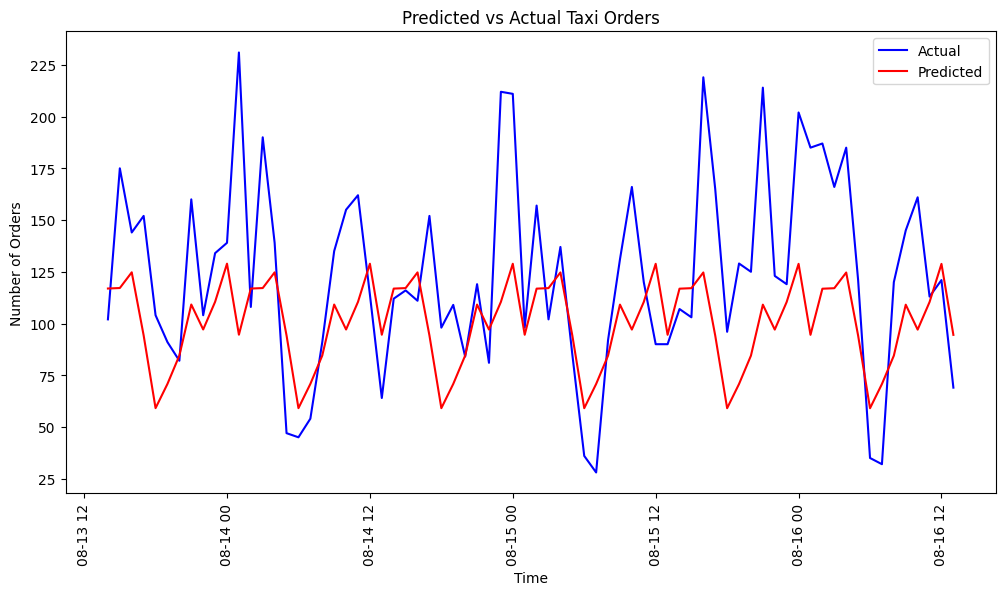

LightGBM RMSE: 46.9227


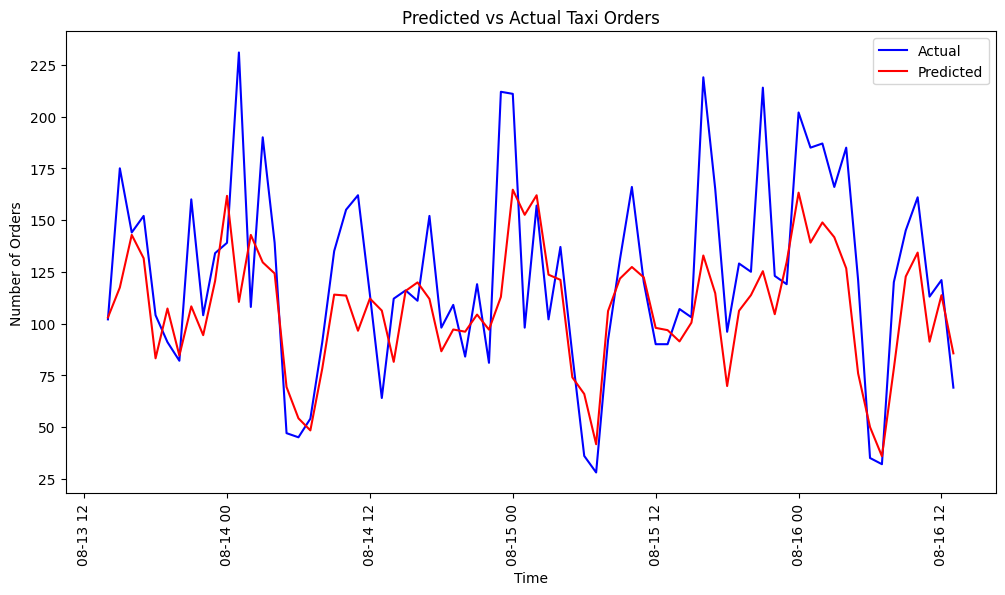

In [20]:
#RMSE for SARIMAX
sarimax_pred = fitted_model.predict(
    start=test.index[0],
    end=test.index[-1],)
sarimax_rmse = mean_squared_error(test['num_orders'], sarimax_pred, squared=False)
print(f"SARIMAX RMSE on Test Dataset: {sarimax_rmse:.2f}")

#Visualize SARIMAX results
plt.figure(figsize=(12, 6))
plt.plot(test.index[:72], test['num_orders'][:72], label='Actual', color='blue')
plt.plot(test.index[:72], sarimax_pred[:72], label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.title('Predicted vs Actual Taxi Orders')
plt.legend()
plt.xticks(rotation=90)
plt.show()

#RMSE for LightGBM
X_test = test[features]
y_test = test['num_orders']
test_dataset = lgb.Dataset(X_test, label=y_test, reference=train_dataset)
lgb_pred = model_lgb.predict(X_test)
lgb_rmse = mean_squared_error(y_test, lgb_pred, squared=False)
print(f'LightGBM RMSE: {lgb_rmse:.4f}')

#Visualize LightGBM results
plt.figure(figsize=(12, 6))
plt.plot(test.index[:72], test['num_orders'][:72], label='Actual', color='blue')
plt.plot(test.index[:72], lgb_pred[:72], label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.title('Predicted vs Actual Taxi Orders')
plt.legend()
plt.xticks(rotation=90)
plt.show()

How does our random forest model fare?

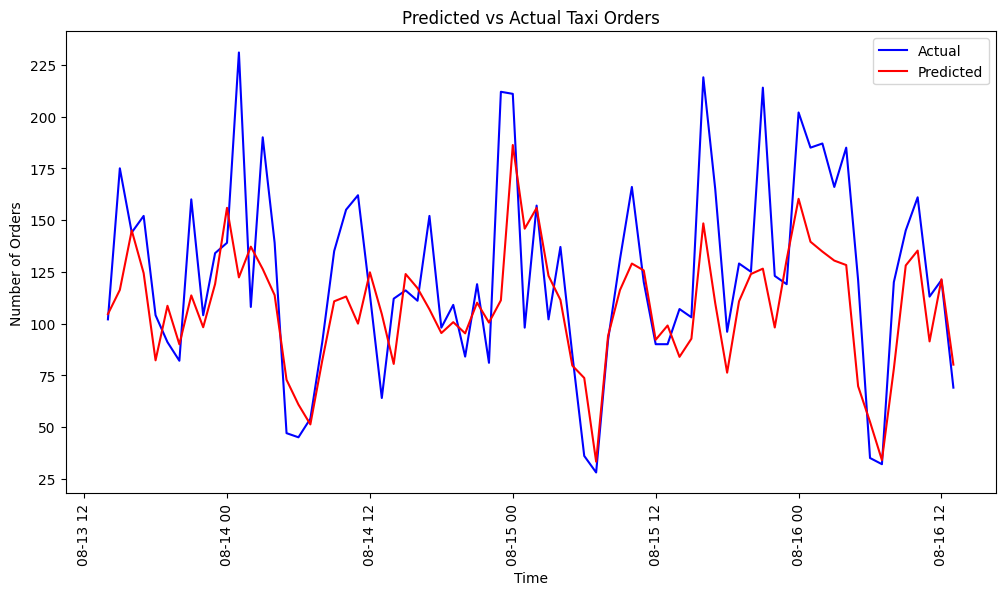

Random Forest RMSE for the test set:  46.24868066602999


In [21]:
test_pred = model_rf.predict(test[features].dropna())

#Visualize LightGBM results
plt.figure(figsize=(12, 6))
plt.plot(test.index[:72], test['num_orders'][:72], label='Actual', color='blue')
plt.plot(test.index[:72], test_pred[:72], label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.title('Predicted vs Actual Taxi Orders')
plt.legend()
plt.xticks(rotation=90)
plt.show()

print("Random Forest RMSE for the test set: ", mean_squared_error(test['num_orders'], test_pred, squared=False))

__Our LightGBM and Random Forest models pass the validation and testing sets with an RMSE of under 48.__


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
So this is another test in the testing section. </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Everything is correct, great job! Yes, some models can be overfitted, so sometimes we do not see good results on the test subset. Although you introduced the validation subset, it may not be enough, since th data is small. In the real tasks, your approach will be a good choice. 
</div>

# Conclusion

We have created and tested various models to forecast taxi orders for Sweet Lift Taxi company. Our objective RMSE to stay under was 48. We only need to forecast one hour into the future, therefore we found models that were suitable for short term forecasting. Various models were tested such as Linear Regression, ARIMA, autoregression, Random Forest, and LightGBM. Random Forest and LightGBM were able to perform successfully on both validation and test sets. Visualizations of both of these models would also further verify the accuracy of the model predictions, and indeed they passed the eye test over the first 72 hours of the test and validation sets.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good, thank you so much! 
    
</div>


# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48